# Project 5
## Image Pre-processing with keras

### Make test-val-train datasets

In [47]:
import os, shutil

In [48]:
!pwd

/Users/srinivasaluri/swarna-DS/Metis/Metis_BC/Challenges/Project5/project5


In [49]:
# The path to the directory where the original dataset was stored.
original_good_dir = '/home/ubuntu/project5/good'
original_bad_dir = '/home/ubuntu/project5/bad'
# The directory where we will store our datasets
base_dir = 'Good_bad_photos'
os.mkdir(base_dir)

In [4]:
# Extract image names from the image files into a list
good_images = list(filter(lambda x: x.endswith('.png'), os.listdir('good'))
bad_images = list(filter(lambda x: x.endswith('.jpg'), os.listdir('bad')))
print(len(good_images), len(bad_images))

10274 5214


In [5]:
# Split names as train, validation and test
# train = 70%, validation = 15% and test = 15%
train_goodNames = good_images[0:3650]
val_goodNames = good_images[3650:4434]
test_goodNames = good_images[4434:5213]
train_badNames = bad_images[0:3650]
val_badNames = bad_images[3650:4434]
test_badNames = bad_images[4434:] 

In [50]:
# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [51]:
# Directory with our training good pictures
train_good_dir = os.path.join(train_dir, "good")
os.mkdir(train_good_dir)

# Directory with our training bad pictures
train_bad_dir = os.path.join(train_dir, "bad")
os.mkdir(train_bad_dir)

# Directory with our validation good pictures
validation_good_dir = os.path.join(validation_dir, "good")
os.mkdir(validation_good_dir)

# Directory with our validation bad pictures
validation_bad_dir = os.path.join(validation_dir, "bad")
os.mkdir(validation_bad_dir)

# Directory with our validation good pictures
test_good_dir = os.path.join(test_dir, "good")
os.mkdir(test_good_dir)

# Directory with our bad pictures
test_bad_dir = os.path.join(test_dir, 'bad')
os.mkdir(test_bad_dir)

In [10]:
# Using filenames(fnames) copy images to train, validationa and test directories
# Copy first 70% of good images to train_good_dir
fnames = train_goodNames
for fname in fnames:
    src = os.path.join(original_good_dir, fname)
    dst = os.path.join(train_good_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 15% images to validation_good_dir
fnames = val_goodNames
for fname in fnames:
    src = os.path.join(original_good_dir, fname)
    dst = os.path.join(validation_good_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 15% good images to test_good_dir
fnames = test_goodNames
for fname in fnames:
    src = os.path.join(original_good_dir, fname)
    dst = os.path.join(test_good_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 70% images to train_bad_dir
fnames = train_badNames
for fname in fnames:
    src = os.path.join(original_bad_dir, fname)
    dst = os.path.join(train_bad_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 15% bad images to validation_bad_dir
fnames = val_badNames
for fname in fnames:
    src = os.path.join(original_bad_dir, fname)
    dst = os.path.join(validation_bad_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 15% bad images to test_bad_dir
fnames = test_badNames
for fname in fnames:
    src = os.path.join(original_bad_dir, fname)
    dst = os.path.join(test_bad_dir, fname)
    shutil.copyfile(src, dst)

In [52]:
# Verify all folders contain transferres images
print('total training good images:', len(os.listdir(train_good_dir)))
print('total validating good images:', len(os.listdir(validation_good_dir)))
print('total testing good images:', len(os.listdir(test_good_dir)))
print('total training bad images:', len(os.listdir(train_bad_dir)))
print('total validating bad images:', len(os.listdir(validation_bad_dir)))
print('total testing bad images:', len(os.listdir(test_bad_dir)))


total training good images: 3650
total validating good images: 784
total testing good images: 779
total training bad images: 3650
total validating bad images: 784
total testing bad images: 780


### Building network

In [53]:
#sequence of the layers in the network
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [55]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Data preprocessing

In [56]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 7300 images belonging to 2 classes.
Found 1568 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

W0912 20:06:12.307665 140644202141440 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
100/100 [==============================] - 53s 534ms/step - loss: 0.6699 - acc: 0.5900 - val_loss: 0.6509 - val_acc: 0.6200
Epoch 2/50
100/100 [==============================] - 48s 477ms/step - loss: 0.6247 - acc: 0.6520 - val_loss: 0.5704 - val_acc: 0.7237
Epoch 3/50
100/100 [==============================] - 49s 491ms/step - loss: 0.5923 - acc: 0.6980 - val_loss: 0.5714 - val_acc: 0.7200
Epoch 4/50
100/100 [==============================] - 47s 474ms/step - loss: 0.5658 - acc: 0.7225 - val_loss: 0.6081 - val_acc: 0.6721
Epoch 5/50
100/100 [==============================] - 48s 481ms/step - loss: 0.5622 - acc: 0.7195 - val_loss: 0.5369 - val_acc: 0.7267
Epoch 6/50
100/100 [==============================] - 49s 489ms/step - loss: 0.5230 - acc: 0.7380 - val_loss: 0.5124 - val_acc: 0.7580
Epoch 7/50
100/100 [==============================] - 46s 462ms/step - loss: 0.5430 - acc: 0.7260 - val_loss: 0.5244 - val_acc: 0.7561
Epoch 8/50
100/100 [==============================] - 4

In [18]:
# save model
model.save('good_bad_images_model.h5')

#### loss and accuracy plots of the model

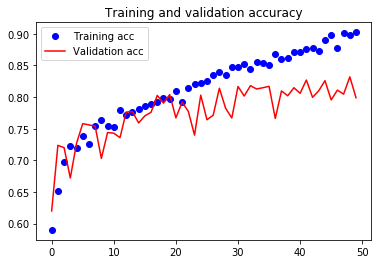

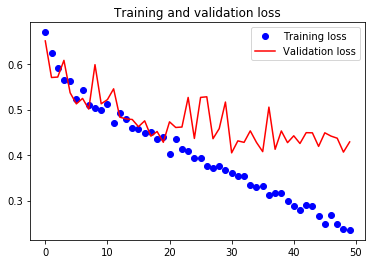

In [19]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Data augmentation
1. rotation_range = a value in degrees (0-180), a range within which to randomly rotate pictures.
2. width_shift and height_shift = ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
3. shear_range = for randomly applying shearing transformations.
4. zoom_range = for randomly zooming inside pictures.
5. horizontal_flip = for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
6. fill_mode = the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


In [18]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

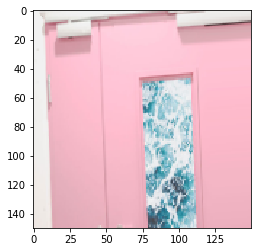

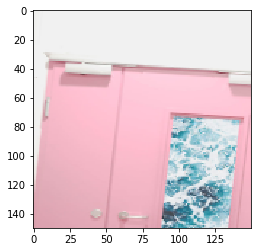

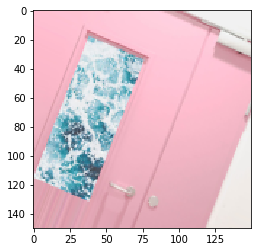

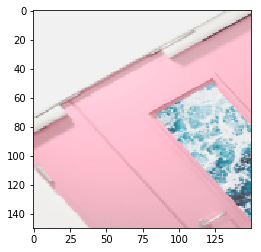

In [19]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

fnames = [os.path.join(train_good_dir, fname) for fname in os.listdir(train_good_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [1]:
from keras import layers
from keras import models
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.
W0911 18:23:32.323772 140310038406912 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 18:23:32.341826 140310038406912 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 18:23:32.344685 140310038406912 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0911 18:23:32.359266 140310038406912 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensor

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 11005 images belonging to 2 classes.
Found 2358 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 66s 659ms/step - loss: 0.5510 - acc: 0.7812 - val_loss: 0.5395 - val_acc: 0.7944
Epoch 2/100
100/100 [==============================] - 60s 601ms/step - loss: 0.5042 - acc: 0.7991 - val_loss: 0.5043 - val_acc: 0.7943
Epoch 3/100
100/100 [==============================] - 60s 597ms/step - loss: 0.4840 - acc: 0.7959 - val_loss: 0.4838 - val_acc: 0.7868
Epoch 4/100
100/100 [==============================] - 62s 615ms/step - loss: 0.5084 - acc: 0.7760 - val_loss: 0.4658 - val_acc: 0.7875
Epoch 5/100
100/100 [==============================] - 64s 638ms/step - loss: 0.4754 - acc: 0.7928 - val_loss: 0.5218 - val_acc: 0.7686
Epoch 6/100
100/100 [==============================] - 60s 603ms/step - loss: 0.4541 - acc: 0.7981 - val_loss: 0.4366 - val_acc: 0.8013
Epoch 7/100
100/100 [==============================] - 60s 597ms/step - loss: 0.4511 - acc: 0.8030 

In [23]:
model.save('good_bad_augment_model.h5')

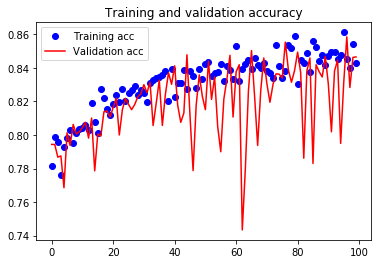

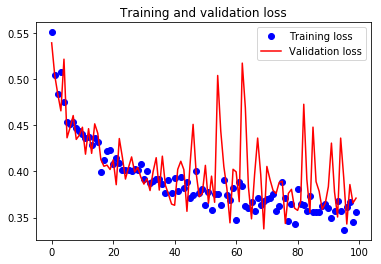

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using convolutional neural networks 

### Feature extraction
Features are extracted from the pretrained model VGG16

In [57]:
from keras.applications import VGG16

In [58]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [59]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [18]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'Good_bad_photos'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 7300 images belonging to 2 classes.
Found 1568 images belonging to 2 classes.
Found 1559 images belonging to 2 classes.


In [19]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [26]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/50
2000/2000 [==============================] - 1s 561us/step - loss: 0.6534 - acc: 0.6280 - val_loss: 0.5068 - val_acc: 0.7930
Epoch 2/50
2000/2000 [==============================] - 1s 325us/step - loss: 0.4916 - acc: 0.7710 - val_loss: 0.4497 - val_acc: 0.8010
Epoch 3/50
2000/2000 [==============================] - 1s 317us/step - loss: 0.4450 - acc: 0.8030 - val_loss: 0.4251 - val_acc: 0.8070
Epoch 4/50
2000/2000 [==============================] - 1s 321us/step - loss: 0.4079 - acc: 0.8275 - val_loss: 0.4068 - val_acc: 0.8130
Epoch 5/50
2000/2000 [==============================] - 1s 318us/step - loss: 0.3870 - acc: 0.8415 - val_loss: 0.3995 - val_acc: 0.8140
Epoch 6/50
2000/2000 [==============================] - 1s 320us/step - loss: 0.3771 - acc: 0.8450 - val_loss: 0.3917 - val_acc: 0.8150
Epoch 7/50
2000/2000 [==============================] - 1s 320us/step - loss: 0.3578 - acc: 0.8570 - val_loss: 0.3862 - val_acc: 0.8180


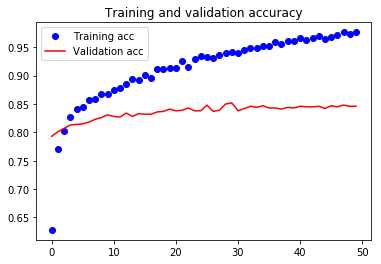

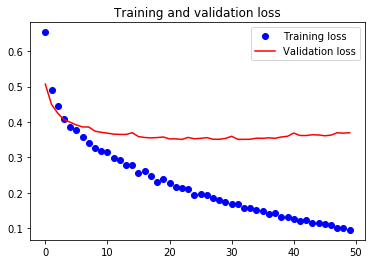

In [27]:
# Loss cureve over the epochs
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [34]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4


In [35]:
conv_base.trainable = False

In [36]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 7300 images belonging to 2 classes.
Found 1568 images belonging to 2 classes.
Epoch 1/30
 - 63s - loss: 0.5877 - acc: 0.7170 - val_loss: 0.4973 - val_acc: 0.7970
Epoch 2/30
 - 57s - loss: 0.4989 - acc: 0.7690 - val_loss: 0.4522 - val_acc: 0.7945
Epoch 3/30
 - 59s - loss: 0.4624 - acc: 0.7935 - val_loss: 0.4424 - val_acc: 0.7920
Epoch 4/30
 - 59s - loss: 0.4431 - acc: 0.7980 - val_loss: 0.4571 - val_acc: 0.7824
Epoch 5/30
 - 57s - loss: 0.4460 - acc: 0.7960 - val_loss: 0.4316 - val_acc: 0.8117
Epoch 6/30
 - 58s - loss: 0.4347 - acc: 0.8030 - val_loss: 0.4019 - val_acc: 0.8160
Epoch 7/30
 - 58s - loss: 0.4281 - acc: 0.8040 - val_loss: 0.3731 - val_acc: 0.8300
Epoch 8/30
 - 59s - loss: 0.4349 - acc: 0.8000 - val_loss: 0.3945 - val_acc: 0.8209
Epoch 9/30
 - 56s - loss: 0.3951 - acc: 0.8315 - val_loss: 0.3724 - val_acc: 0.8310
Epoch 10/30
 - 58s - loss: 0.4018 - acc: 0.8250 - val_loss: 0.3748 - val_acc: 0.8239
Epoch 11/30
 - 59s - loss: 0.3893 - acc: 0.8255 - val_loss: 0.3547 - val_ac

In [38]:
model.save('good_bad_images_model2.h5')

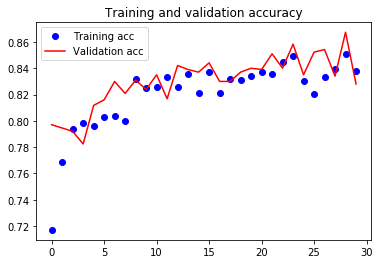

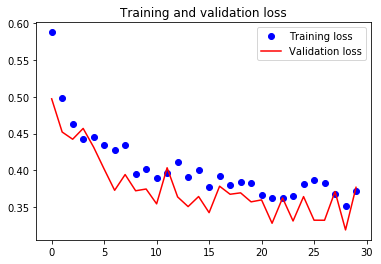

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

## Fine tuning

### Fine tuning block 5

In [60]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [61]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [62]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [47]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 62s 622ms/step - loss: 0.1561 - acc: 0.9430 - val_loss: 0.3508 - val_acc: 0.9099
Epoch 2/100
100/100 [==============================] - 58s 582ms/step - loss: 0.1568 - acc: 0.9460 - val_loss: 0.5927 - val_acc: 0.8620
Epoch 3/100
100/100 [==============================] - 57s 573ms/step - loss: 0.1586 - acc: 0.9430 - val_loss: 0.3506 - val_acc: 0.9200
Epoch 4/100
100/100 [==============================] - 57s 573ms/step - loss: 0.1371 - acc: 0.9520 - val_loss: 0.3304 - val_acc: 0.9060
Epoch 5/100
100/100 [==============================] - 56s 564ms/step - loss: 0.1402 - acc: 0.9445 - val_loss: 0.4025 - val_acc: 0.8968
Epoch 6/100
100/100 [==============================] - 58s 581ms/step - loss: 0.1515 - acc: 0.9470 - val_loss: 0.3032 - val_acc: 0.9221
Epoch 7/100
100/100 [==============================] - 57s 566ms/step - loss: 0.1522 - acc: 0.9425 - val_loss: 0.5343 - val_acc: 0.8900
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 56s 558ms/step - loss: 0.1515 - acc: 0.9435 - val_loss: 0.5579 - val_acc: 0.8978
Epoch 62/100
100/100 [==============================] - 58s 583ms/step - loss: 0.1214 - acc: 0.9585 - val_loss: 0.3888 - val_acc: 0.9200
Epoch 63/100
100/100 [==============================] - 57s 567ms/step - loss: 0.1294 - acc: 0.9535 - val_loss: 0.4249 - val_acc: 0.9109
Epoch 64/100
100/100 [==============================] - 55s 546ms/step - loss: 0.1383 - acc: 0.9570 - val_loss: 0.3884 - val_acc: 0.9100
Epoch 65/100
100/100 [==============================] - 60s 601ms/step - loss: 0.0948 - acc: 0.9645 - val_loss: 0.8433 - val_acc: 0.8856
Epoch 66/100
100/100 [==============================] - 57s 565ms/step - loss: 0.1451 - acc: 0.9575 - val_loss: 0.3878 - val_acc: 0.9160
Epoch 67/100
100/100 [==============================] - 57s 568ms/step - loss: 0.1464 - acc: 0.9505 - val_loss: 0.4259 - val_acc: 0.9130
Epoch 68/100
100/100 [===================

In [48]:
model.save('good_bad_images_model3.h5')

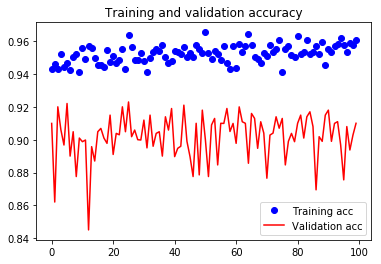

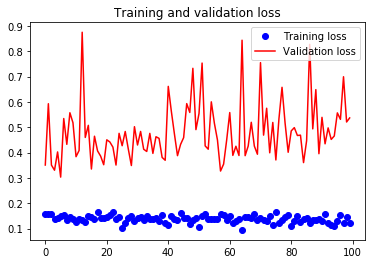

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

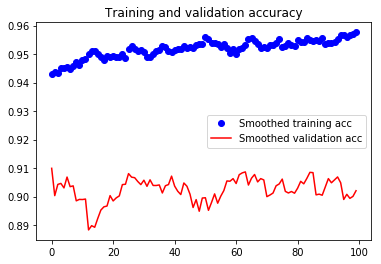

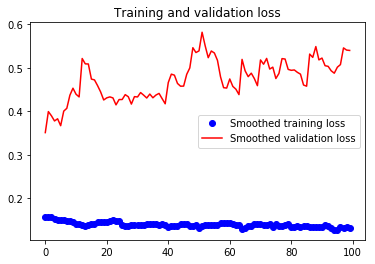

In [50]:
#smotthening of the curve
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'r', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'r', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Load Model and test accuracy 

In [64]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [65]:
# loading fine-tuned model 
model.load_weights("good_bad_images_model3.h5")

In [66]:
# Measure accuracy of the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1559 images belonging to 2 classes.
test acc: 0.8899999916553497


In [124]:
# List of images to test the model
images = ["Good_bad_photos/test/good/58429394.png",
          "Good_bad_photos/test/good/92271533.png",
          "Good_bad_photos/test/good/80314675.png",
          "Good_bad_photos/test/good/39399178.png",
          "Good_bad_photos/test/good/125068777.png",
          "Good_bad_photos/test/good/139785391.png",
          "Good_bad_photos/test/bad/163925_1476344681162_3774175_n.jpg",
          "Good_bad_photos/test/bad/167762_1476346921218_2172508_n.jpg",
          "Good_bad_photos/test/bad/1025952_818460284836734_114876137_o.jpg",
          "Good_bad_photos/test/bad/198958_141029129297153_2622012_n.jpg",
          "Good_bad_photos/test/bad/204358_10150258094343968_5616979_o.jpg",
          "Good_bad_photos/test/bad/204358_10150258094343968_5616979_o.jpg",
          "Good_bad_photos/test/bad/200929_10150258141863968_6051468_o.jpg"]

In [125]:
# function to predict good or bad images (classes: good = 1, bad = 0)
from keras.preprocessing import image
import numpy as np
def predict_image_classes(images):
    results = []
    Image = []
    for i in images:
        test_image= image.load_img(i, target_size = (150, 150, 3)) 
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict_classes(test_image)[0]
        results.append(result)
    for i in images:
        img = i.split("/")[-1]
        Image.append(img)
    return list(zip(Image, results))
        

In [126]:
(predict_image_classes(images))

[('58429394.png', array([1], dtype=int32)),
 ('92271533.png', array([0], dtype=int32)),
 ('80314675.png', array([1], dtype=int32)),
 ('39399178.png', array([1], dtype=int32)),
 ('125068777.png', array([1], dtype=int32)),
 ('139785391.png', array([1], dtype=int32)),
 ('163925_1476344681162_3774175_n.jpg', array([0], dtype=int32)),
 ('167762_1476346921218_2172508_n.jpg', array([0], dtype=int32)),
 ('1025952_818460284836734_114876137_o.jpg', array([0], dtype=int32)),
 ('198958_141029129297153_2622012_n.jpg', array([1], dtype=int32)),
 ('204358_10150258094343968_5616979_o.jpg', array([0], dtype=int32)),
 ('204358_10150258094343968_5616979_o.jpg', array([0], dtype=int32)),
 ('200929_10150258141863968_6051468_o.jpg', array([0], dtype=int32))]

## Launching flask app

In [107]:
from keras.preprocessing import image
import numpy as np
def predict_photo(img):
    #img = input("Upload your photo:")
    from keras.preprocessing import image
    import numpy as np
    test_image= image.load_img(img, target_size = (150, 150, 3)) 
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict_classes(test_image)[0][0]
    if result == 1:
        return "Your photography skills are good"
    else:
        return "Your photo needs to be improved"

In [85]:
predict_photo()

Upload your photo:test_photos/img5.jpg
Your photography skills are good


In [68]:
import html
from flask import render_template, request, Flask

In [128]:
# Initialize the app
app = Flask(__name__)
@app.route("/")
def image_page():
    with open("image.html", 'r') as image_file:
        return image_file.read()
    
@app.route("/image", methods=["POST", "GET"])
def image():
    img = request.args.get("txt","0")
    r = predict_photo(img)
    return render_template('image.html', rec = [r])

In [134]:
app.run(host='0.0.0.0', port=5000)

 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Sep/2019 18:17:32] "GET / HTTP/1.1" 200 -
